In [2]:
import os
import requests
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
import yfinance as yf


In [37]:
def read_data(data, start, end):
    data_df = yf.download(data, start, end)
    data_df.dropna(inplace = True)
    dataclose_df = data_df["Close"]
    return dataclose_df

In [41]:
defport = read_data(['GROW.AX', 'DHOF.AX', 'IHCB.AX', 'VDCO.AX', 'MVA.AX', 'GOLD.AX'],"2019-04-01","2022-03-31")
shareport = read_data(['VHY.AX', 'EX20.AX', '360.AX', 'ANZ.AX', 'SQ2.AX', 'CBA.AX', 'PXA.AX', 'ALD.AX', 'AMC.AX', 'BHP.AX', 'APA.AX', 'BXB.AX', 'CHC.AX', 'COL.AX', 'WES.AX', 'CSL.AX', 'RMD.AX', 'TLS.AX', 'QAN.AX', 'VCX.AX', 'ANN.AX'],"2019-04-01","2022-03-31")
growport = read_data(['QUAL.AX',  'FEMX.AX',   'ACDC.AX', 'CLDD.AX'],"2019-04-01","2022-03-31")
# 'MCSG.XA','MCSI.XA', include these 

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  21 of 21 completed
[*********************100%***********************]  4 of 4 completed


In [44]:
close_df = pd.concat([defport, shareport, growport], axis = "columns", join = "inner")
close_df.dropna(inplace = True)
close_df.head()

,DHOF.AX,GOLD.AX,GROW.AX,IHCB.AX,MVA.AX,VDCO.AX,360.AX,ALD.AX,AMC.AX,ANN.AX,...,RMD.AX,SQ2.AX,TLS.AX,VCX.AX,VHY.AX,WES.AX,ACDC.AX,CLDD.AX,FEMX.AX,QUAL.AX
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-20,9.9566,236.800003,3.79,106.879997,24.490000,53.070000,8.53,30.750000,17.150000,33.610001,...,33.360001,176.630005,4.15,1.670,66.250000,54.299999,96.260002,13.20,7.08,41.400002
2022-01-21,9.9437,238.320007,3.77,107.220001,24.059999,52.910000,8.11,30.030001,16.780001,32.990002,...,32.790001,172.500000,4.09,1.630,64.760002,53.070000,95.199997,12.91,7.08,40.650002
2022-01-24,9.9218,238.490005,3.74,107.309998,24.350000,52.830002,7.39,29.799999,16.840000,33.099998,...,32.730000,166.250000,4.05,1.670,64.250000,53.000000,94.070000,12.73,7.04,40.610001
2022-01-25,9.9400,240.529999,3.74,107.120003,23.440001,52.520000,7.62,29.010000,16.610001,32.150002,...,32.660000,159.250000,3.93,1.610,62.650002,52.549999,91.139999,12.70,6.97,40.119999
2022-01-27,9.9200,238.800003,3.73,106.000000,22.830000,52.150002,7.10,29.110001,16.340000,31.219999,...,31.400000,150.729996,3.88,1.585,62.250000,50.610001,89.440002,12.18,6.80,39.549999


In [45]:
datareturns_df = close_df.pct_change().copy()
datareturns_df.head(10)

,DHOF.AX,GOLD.AX,GROW.AX,IHCB.AX,MVA.AX,VDCO.AX,360.AX,ALD.AX,AMC.AX,ANN.AX,...,RMD.AX,SQ2.AX,TLS.AX,VCX.AX,VHY.AX,WES.AX,ACDC.AX,CLDD.AX,FEMX.AX,QUAL.AX
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-21,-0.001296,0.006419,-0.005277,0.003181,-0.017558,-0.003015,-0.049238,-0.023415,-0.021574,-0.018447,...,-0.017086,-0.023382,-0.014458,-0.023952,-0.022491,-0.022652,-0.011012,-0.021970,0.000000,-0.018116
2022-01-24,-0.002202,0.000713,-0.007958,0.000839,0.012053,-0.001512,-0.088779,-0.007659,0.003576,0.003334,...,-0.001830,-0.036232,-0.009780,0.024540,-0.007875,-0.001319,-0.011870,-0.013943,-0.005650,-0.000984
2022-01-25,0.001834,0.008554,0.000000,-0.001771,-0.037372,-0.005868,0.031123,-0.026510,-0.013658,-0.028701,...,-0.002139,-0.042105,-0.029630,-0.035928,-0.024903,-0.008491,-0.031147,-0.002357,-0.009943,-0.012066
2022-01-27,-0.002012,-0.007192,-0.002674,-0.010456,-0.026024,-0.007045,-0.068241,0.003447,-0.016255,-0.028927,...,-0.038579,-0.053501,-0.012723,-0.015528,-0.006385,-0.036917,-0.018653,-0.040945,-0.024390,-0.014207
2022-01-28,0.000000,-0.001591,-0.002681,0.004528,0.022339,0.006903,0.076056,-0.005496,0.028764,0.000641,...,-0.004777,-0.009686,0.020619,0.012618,0.023775,0.042087,0.010733,0.017241,0.014706,0.021997
2022-01-31,0.000000,-0.003733,0.013441,-0.004508,0.013710,0.001143,0.073298,0.026943,0.000595,-0.143406,...,0.020800,0.081329,-0.010101,0.015576,-0.007532,-0.000569,0.010841,0.035512,0.010145,0.023998
2022-02-01,-0.006048,-0.001726,0.000000,0.002830,0.005072,0.003424,0.042683,0.010764,0.008323,-0.003363,...,0.024765,0.060653,0.005102,0.003067,0.004427,0.001707,0.014226,0.040530,0.014347,0.007973
2022-02-02,0.000000,-0.009995,0.002653,0.000847,0.005467,0.002085,0.011696,0.014975,-0.035377,-0.026247,...,0.003365,-0.056367,0.010152,0.006116,0.014009,0.015909,0.010466,0.013483,0.001414,0.011026


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

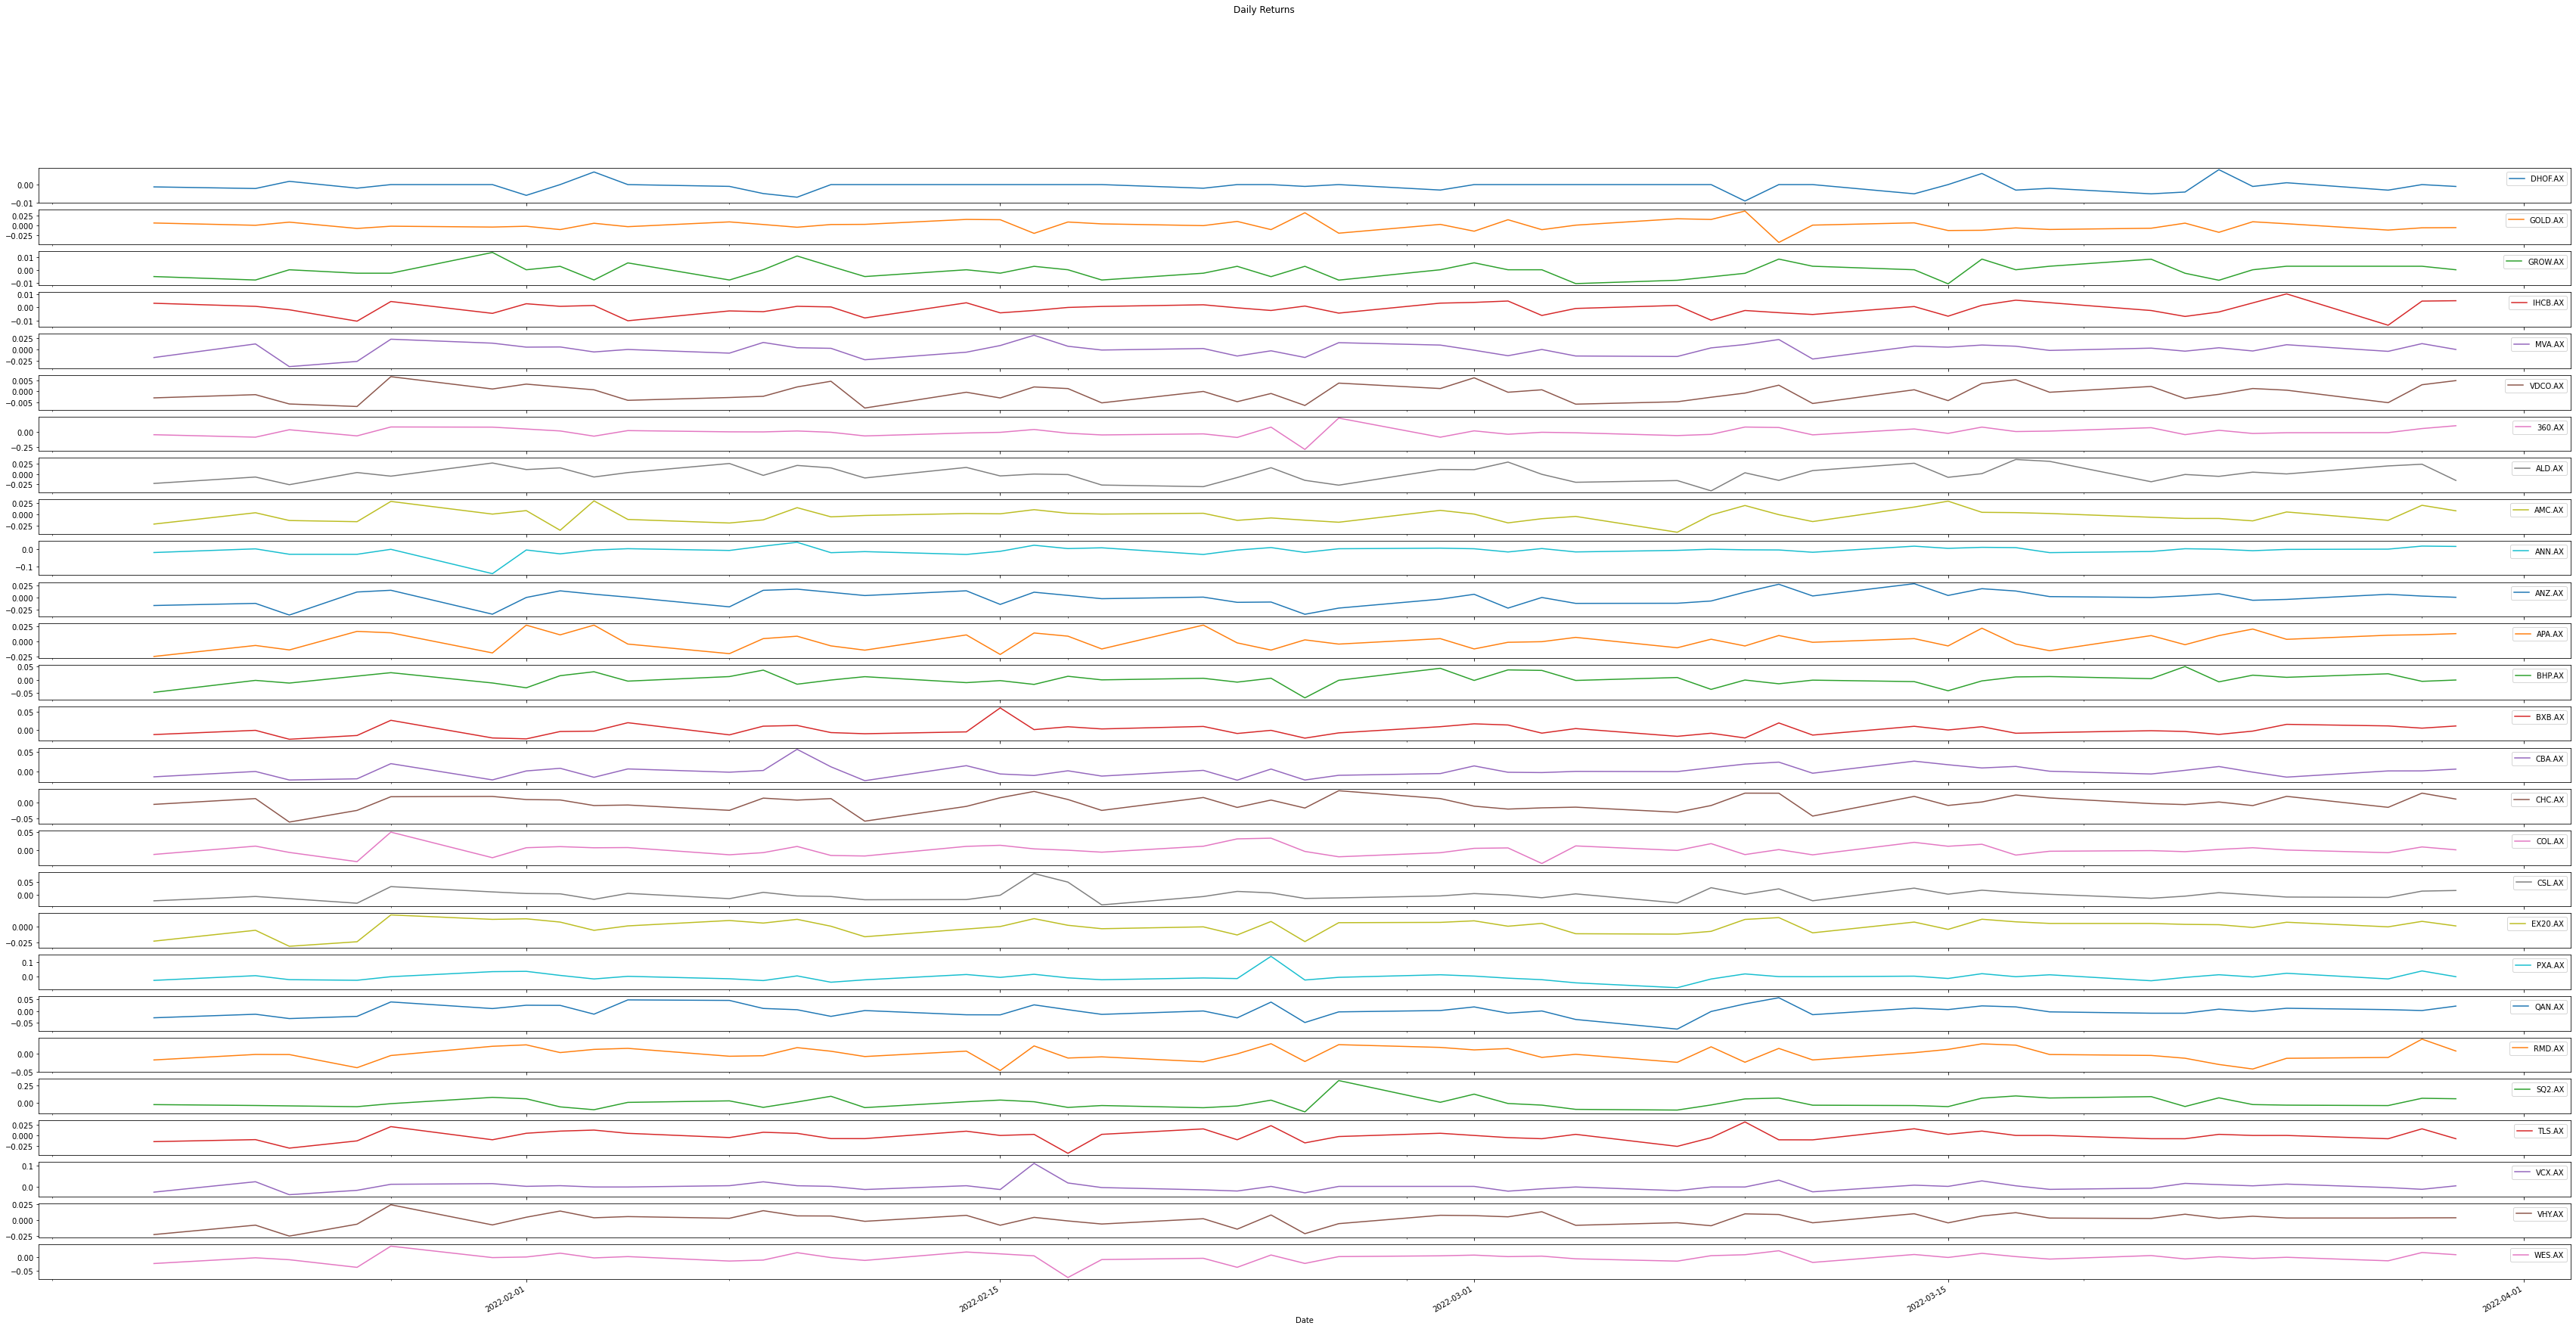

In [25]:
datareturns_df.plot(subplots=True,figsize=(60, 30), title="Daily Returns")
#graph individually,for loop graphing each column

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

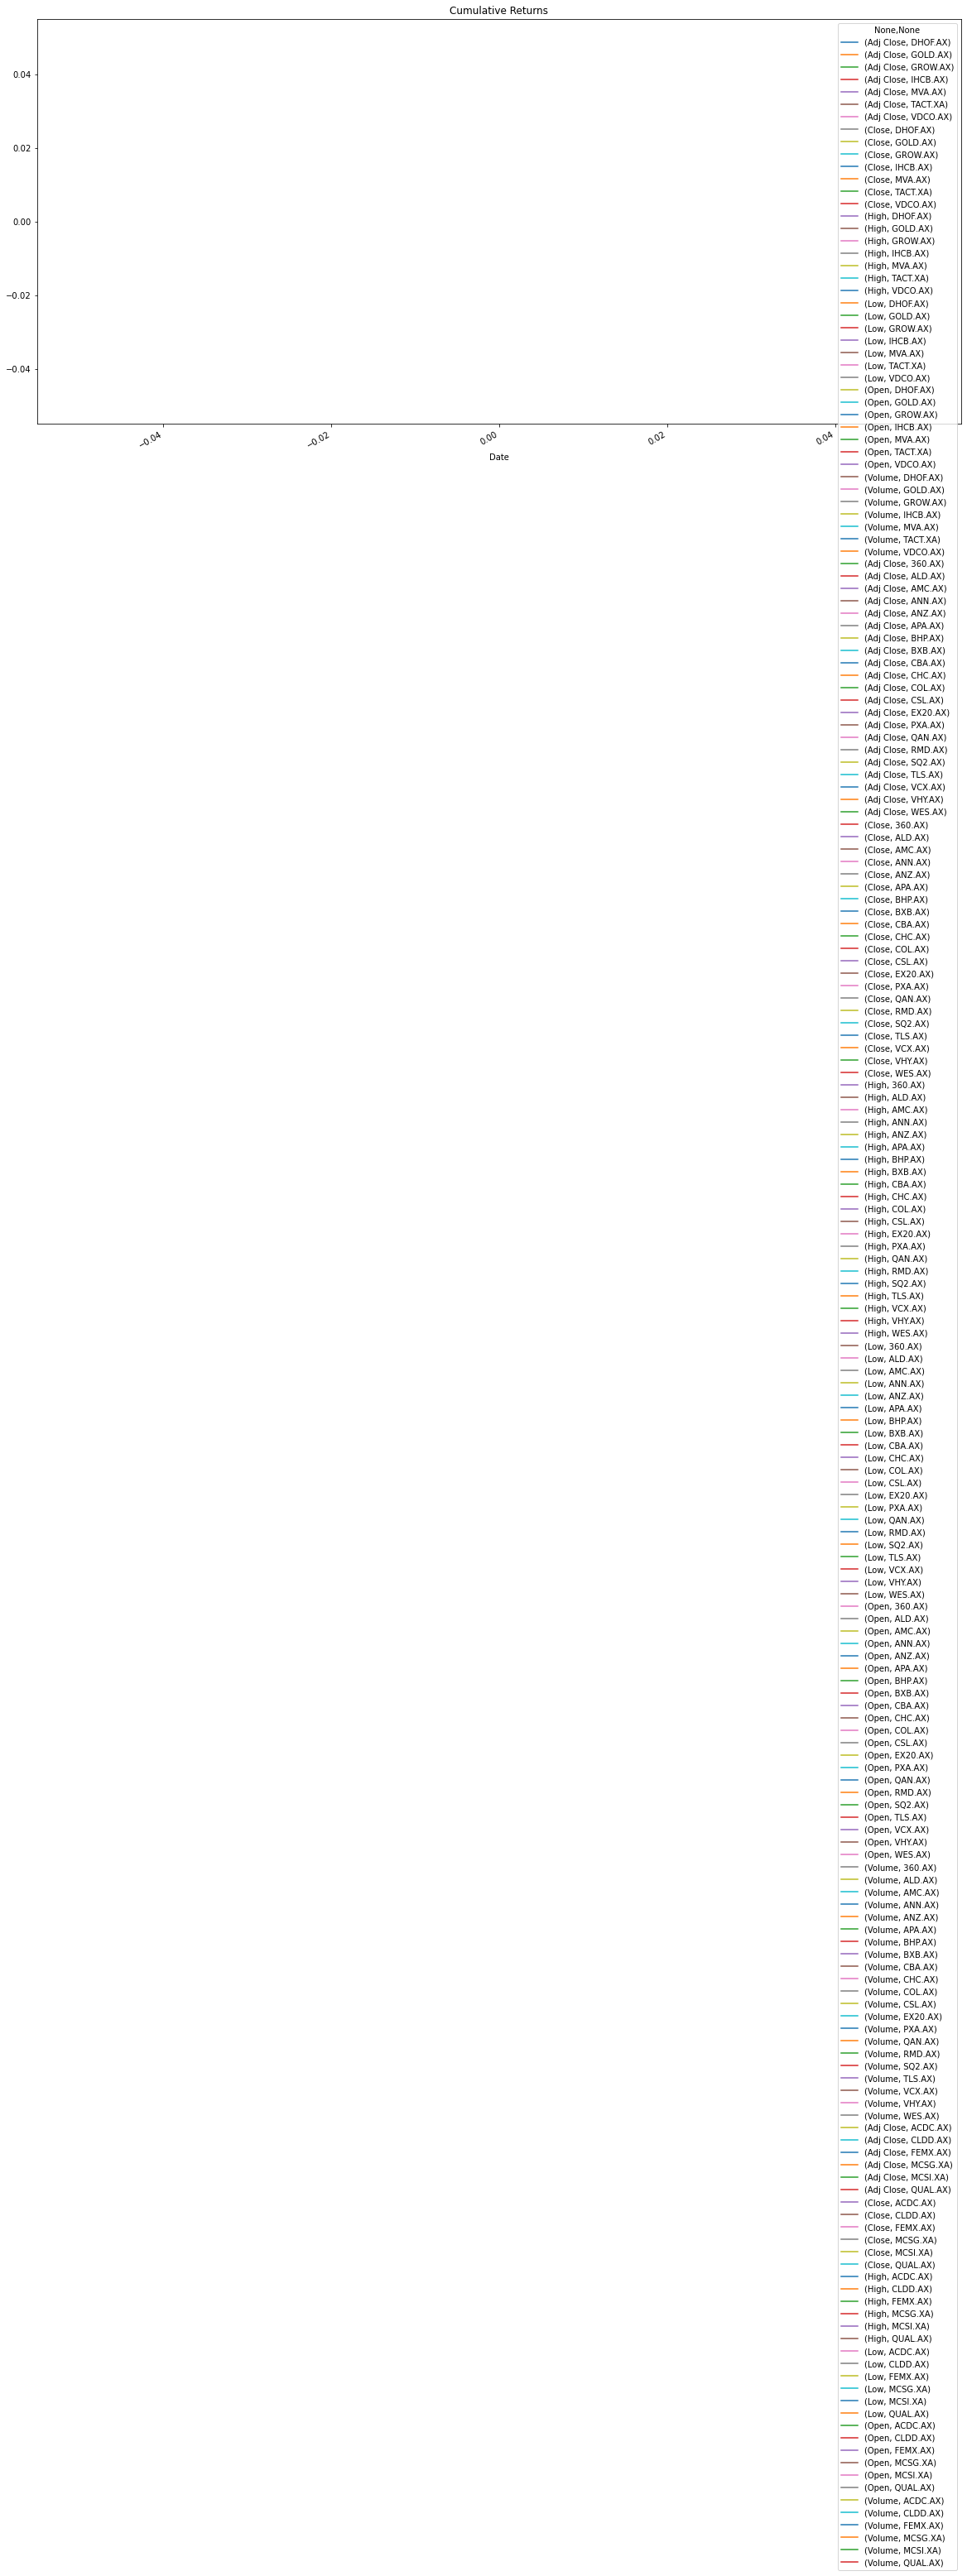

In [19]:
cumulative_returns = (1 + Possible_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns")